In [1]:
import matplotlib.pyplot as plt
import numpy as np


from aart_func import *
import params
from params import * # The file params.py contains all the relevant parameters for the simulations
from astropy import units as u
import kgeo
import image_tools as tls
import subprocess
import scipy.interpolate
from scipy.interpolate import interp1d
import fileloading
import bigRunComputing
from matplotlib import ticker
from matplotlib.lines import Line2D

%load_ext autoreload
%autoreload 2
import importlib 
from functools import partial
import astroModels
import runDataClass
import classRunComputing
import subprocess
from matplotlib.patches import Circle
import kgeo
import numpy as np
from matplotlib import ticker


import EZPaths
import os

import astroPloting
import image_tools
from aart_func import *
from image_tools import curve_params
from params import *
import importlib
import params
import astroModels
import fileloading
from movieMakerV2 import movieMakerIntensity
import normalizingBrightparams
from astropy import units as u
import re

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from movieMakerV2 import intensityBlurr

Welcome to eht-imaging! v 1.2.7 



/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:158: SyntaxWarning: invalid escape sequence '\m'
/home/td6241/anaconda3/envs/mural/lib/python3.12/site-packages/kgeo-0.0.1-py3.12.egg/kgeo/bfields.py:183: SyntaxWarning: invalid escape sequence '\m'


In [2]:
fig_home = '/home/td6241/results/aart/expGMRHD/'
fileloading.creatSubDirectory(fig_home)

Subdirectory for  '/home/td6241/results/aart/expGMRHD/' already exist, doing nothing


In [3]:
plt.rcParams.update({
    'font.size' : 14,                   # Set font size to 11pt
    'axes.labelsize': 14,               # -> axis labels
    'legend.fontsize': 12,              # -> legends
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
    ),
    'font.family': 'Latin Modern Roman',
})

In [4]:
run2 = runDataClass.exp1

bigRun = classRunComputing.BigRuns(
    run2.getRunName(),
    run2.getBrightparams(),
    run2.getBPVarNames(),
    run2.getGeoGrid(),
    run2.getGeoGridNames(),
    normalized_brightparams=run2.getIsNormalized(),
)

# ModelA32 = runDataClass.SingleModelData(bigRun2.getSubPaths(),run2.getRunName(),"ModelA_32")

Subdirectory for storing all run results '/scratch/gpfs/td6241/aart/bigRuns/' already exist, doing nothing
Subdirectory for storing this run result '/scratch/gpfs/td6241/aart/bigRuns/exp1/' already exist, doing nothing
Subdirectory for images '/scratch/gpfs/td6241/aart/bigRuns/exp1/Images/' already exist, doing nothing
Subdirectory for data '/scratch/gpfs/td6241/aart/bigRuns/exp1/Data/' already exist, doing nothing
Subdirectory for inter model data '/scratch/gpfs/td6241/aart/bigRuns/exp1/InterModel/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/Data/geo/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/Data/intensity/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/Data/numpy/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/Images/fluxVNu/' already exist, doing nothing
Subdirectory for  '/scratch/gpfs/td6241/aart/bigRuns/exp1/I

# Row Plot

In [5]:

plt.rcParams.update({
    'font.size' : 14,                   # Set font size to 11pt
    'axes.labelsize': 14,               # -> axis labels
    'legend.fontsize': 12,              # -> legends
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
    ),
    'font.family': 'Latin Modern Roman',
})
n0_color = "#d55e00"
n1_color = "#0072b2"
n2_color = "#009e73"
cumu_color = "#cc79a7"


RingStyle ={
    "label": ['n=0','n=1','n=2','total'],
    "color": [n0_color,n1_color,n2_color,cumu_color],
    "linewidth": [3,3,3,4]
}
line_styles = {
    "lab_frame": "-",
    "rest_frame": "--",
    "thick":"-",
    "thin":"--"
}
xTickParams = {
    'length':15,
    'width': 1,
    'labelrotation': 0,
    'which':'major'
}

action = {
    "var": "nu0",
    "start": 10e9,
    "stop": 700e9,
    "step": 20e9,
    "images": True
}

conv_1_style = {
    "color": 'dimgrey',
    "linestyle": "-",
    "linewidth": 1
}
flux_peak_style = {
    "color": 'k',
    "linestyle": "-.",
    "linewidth": 2
}

r_outer_style = {
    "color": 'dimgrey',
    "linestyle": "-",
    "linewidth": 7
}

In [6]:
def createFluxRadiiGraph(ax,xaxis,janksys_thin,janksys_thick,fiducial_thin=None,fiducial_thick=None):

    ax.plot(xaxis, janksys_thin[:, 0], '-', label='n=0', color='tab:red', linewidth=3)
    janksky_line_style ={
        "label": ['n=0','n=1','n=2','total'],
        "color": [n0_color,n1_color,n2_color,cumu_color],
        "linewidth": [3,3,3,4]
    }

    amount_to_plot = 4
    

    if fiducial_thin is not None:
        for i in (range(amount_to_plot)):
            ax.plot(xaxis, 
                    fiducial_thin[:, i], 
                    line_styles["thin"],
                    label=RingStyle["label"][i], 
                    color=RingStyle["color"][i],
                    linewidth=RingStyle["linewidth"][i],
                    alpha=0.3)

            ax.plot(xaxis, fiducial_thick[:, i], 
                    line_styles["thick"],
                    label=RingStyle["label"][i], 
                    color=RingStyle["color"][i],
                    linewidth=RingStyle["linewidth"][i],
                    alpha=0.3)
            
    for i in (range(amount_to_plot)):
        ax.plot(xaxis, 
                janksys_thin[:, i], 
                line_styles["thin"],
                label=RingStyle["label"][i], 
                color=RingStyle["color"][i],
                linewidth=RingStyle["linewidth"][i])

        ax.plot(xaxis, 
                janksys_thick[:, i], 
                line_styles["thick"],
                label=RingStyle["label"][i], 
                color=RingStyle["color"][i],
                linewidth=RingStyle["linewidth"][i])
        


    # ax.axvline(poi["flux_peak_thin"], color=flux_peak_style["color"],
    #            linestyle=flux_peak_style["linestyle"], linewidth=flux_peak_style["linewidth"])

    # Labels

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
    # ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.1f'))
    # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
    # ax1.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.4f'))
    # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0e"))

    ax.tick_params('x', which="both", labelbottom=False)
    ax.tick_params('y', which="both", labelleft=False)

    n = 4  # Keeps every 4th label
    [l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_minorticklabels()) if i % n != 0]
    ax.tick_params('both', length=10, width=1, which='major')
    ax.set_xlim(xaxis[0], xaxis[xaxis.size - 1])
    ax.set_ylim(10e-5, 10e1)
    # ax.legend(loc='upper right')

    new_ticks = [xaxis[0], 230, xaxis[xaxis.size - 1]]
    ax.set_xticks(new_ticks)
    


    # ax.legend(Legendlines,Legendlabels)
    # ax.tick_params('x', length=10, width=1, which='major', labelrotation=90)


In [9]:
bigRun[0,1,1]['hname']

'a>0.9375--t_e0>5.00e+10--b_0>10.00'

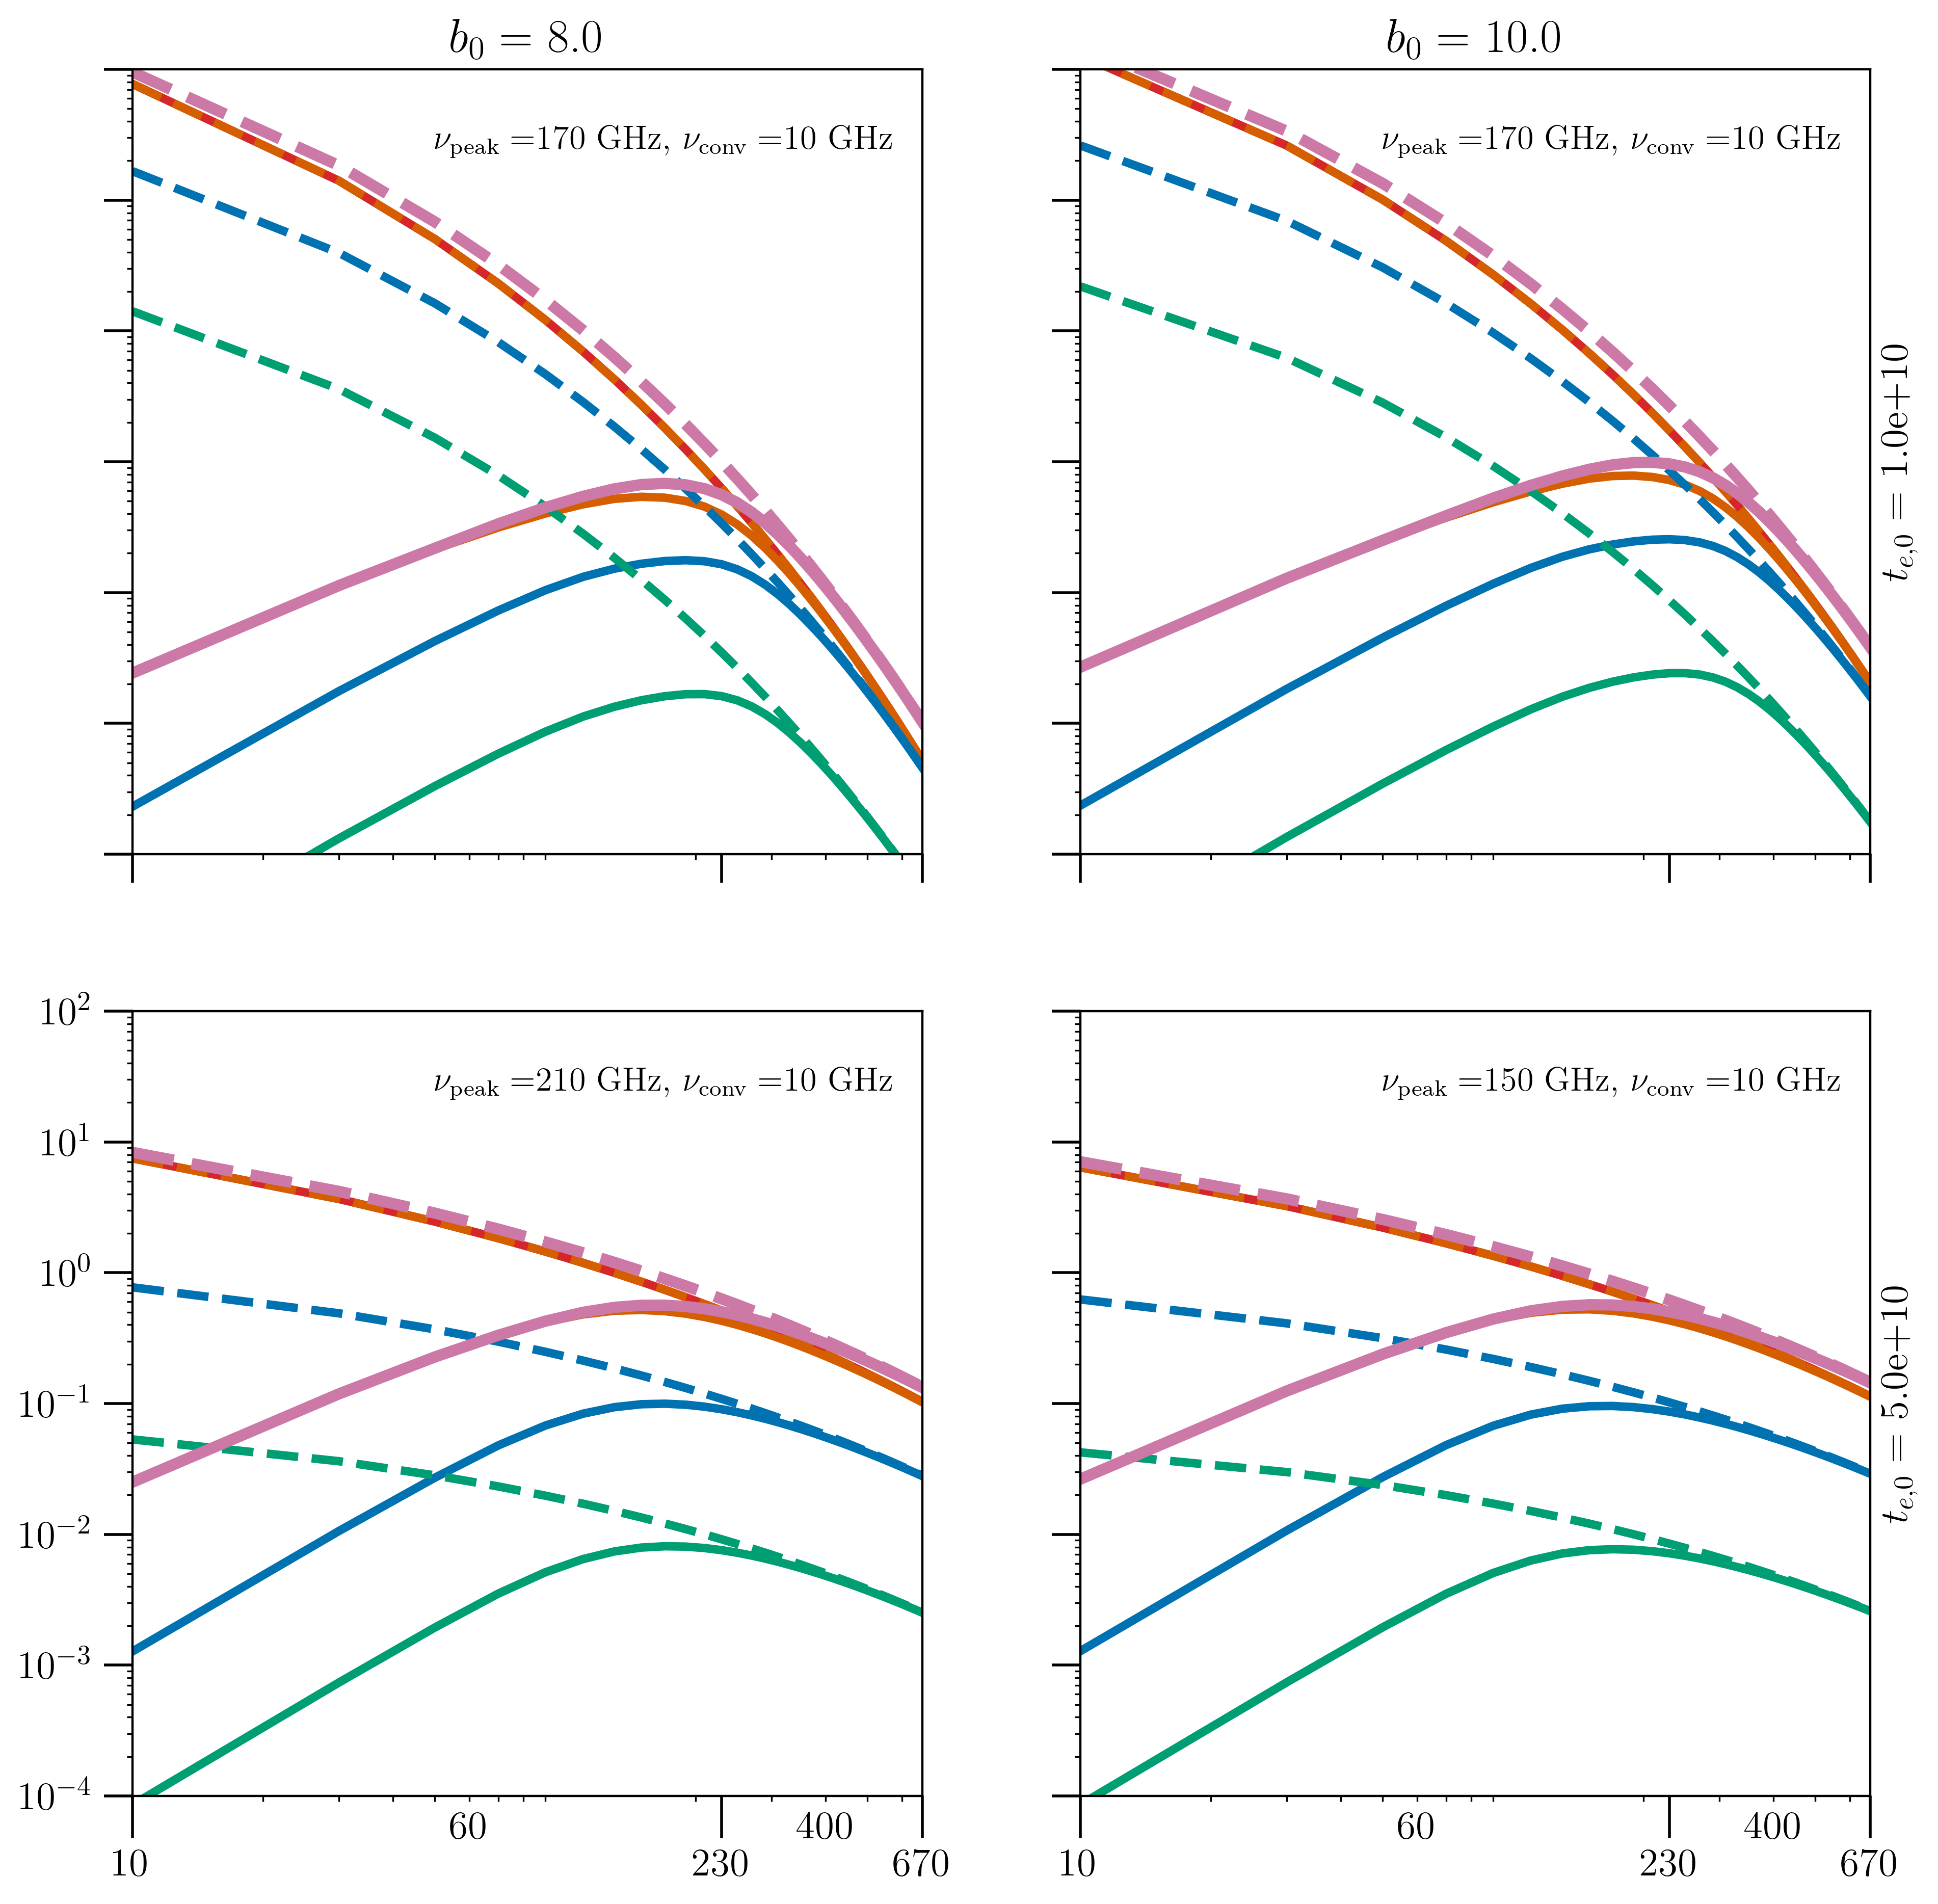

In [10]:
fig, ax = plt.subplots(2,2,dpi=400,figsize=[11,11],sharex=True,sharey=True)


for i in range(2):
    for j in range(2):
        currentModel = bigRun[0,j,i]
        createFluxRadiiGraph(ax[j,i],currentModel['np']['xvar']()/1e9,currentModel['np']['jansky_thin'](),currentModel['np']['jansky_thick']())
        text = R"$\nu_{\rm peak}=$" + str("{:.0f}".format(currentModel['flux_peak'](3)/1e9)) + ' ' + astroModels.units_label["nu0"]  + R", $\nu_{\rm conv}=$" + str("{:.0f}".format(currentModel['conv']/1e9)) + ' ' + astroModels.units_label["nu0"]
        ax[i,j].text(50, 25, text , fontsize=12, color="k")
        
        if (j == 0):
            ax[j,i].title.set_text(R'$b_0=$ ' + "{:.1f}".format(currentModel['bp']["b_0"]))
            
        if (i == 1):
            ax[j,i].set_ylabel(R'$t_{e,0}=$ ' + "{:.1e}".format(currentModel['bp']["t_e0"]))
            ax[j,i].yaxis.set_label_position('right')
# i = 1
# j = 
# createFluxRadiiGraph(ax[i],bigRun[0,0,i]['np']['xvar']()/1e9,bigRun[0,0,i]['np']['jansky_thin'](),bigRun[0,0,i]['np']['jansky_thick']())

# i = 1
# createFluxRadiiGraph(ax[i],bigRun[0,0,i]['np']['xvar']()/1e9,bigRun[0,0,i]['np']['jansky_thin'](),bigRun[0,0,i]['np']['jansky_thick']())

# i = 1
# createFluxRadiiGraph(ax[i],bigRun[0,0,i]['np']['xvar']()/1e9,bigRun[0,0,i]['np']['jansky_thin'](),bigRun[0,0,i]['np']['jansky_thick']())


ax[1,0].tick_params('y', which="both", labelleft=True)
ax[1,0].tick_params('y', which="both", labelleft=True)



ax[1,0].tick_params('x', which="both", labelbottom=True)
ax[1,1].tick_params('x', which="both", labelbottom=True)


n = 6  # Keeps every 4th label
[l.set_visible(False) for (i, l) in enumerate(ax[1,0].xaxis.get_minorticklabels()) if i % n != 0]
ax[1,0].tick_params('x', 
      length=xTickParams["length"], 
      width=xTickParams["width"], 
      which=xTickParams["which"], 
      labelrotation=xTickParams["labelrotation"])

n = 6  # Keeps every 4th label
[l.set_visible(False) for (i, l) in enumerate(ax[1,1].xaxis.get_minorticklabels()) if i % n != 0]
ax[1,1].tick_params('x', 
      length=xTickParams["length"], 
      width=xTickParams["width"], 
      which=xTickParams["which"], 
      labelrotation=xTickParams["labelrotation"])




# if k in alphaTlabel:
#     ax[i,j].set_ylabel(R'$\alpha_T=$ ' + str(currentModel['bp']["p_temp"]))
#     ax[i,j].yaxis.set_label_position('right')
            

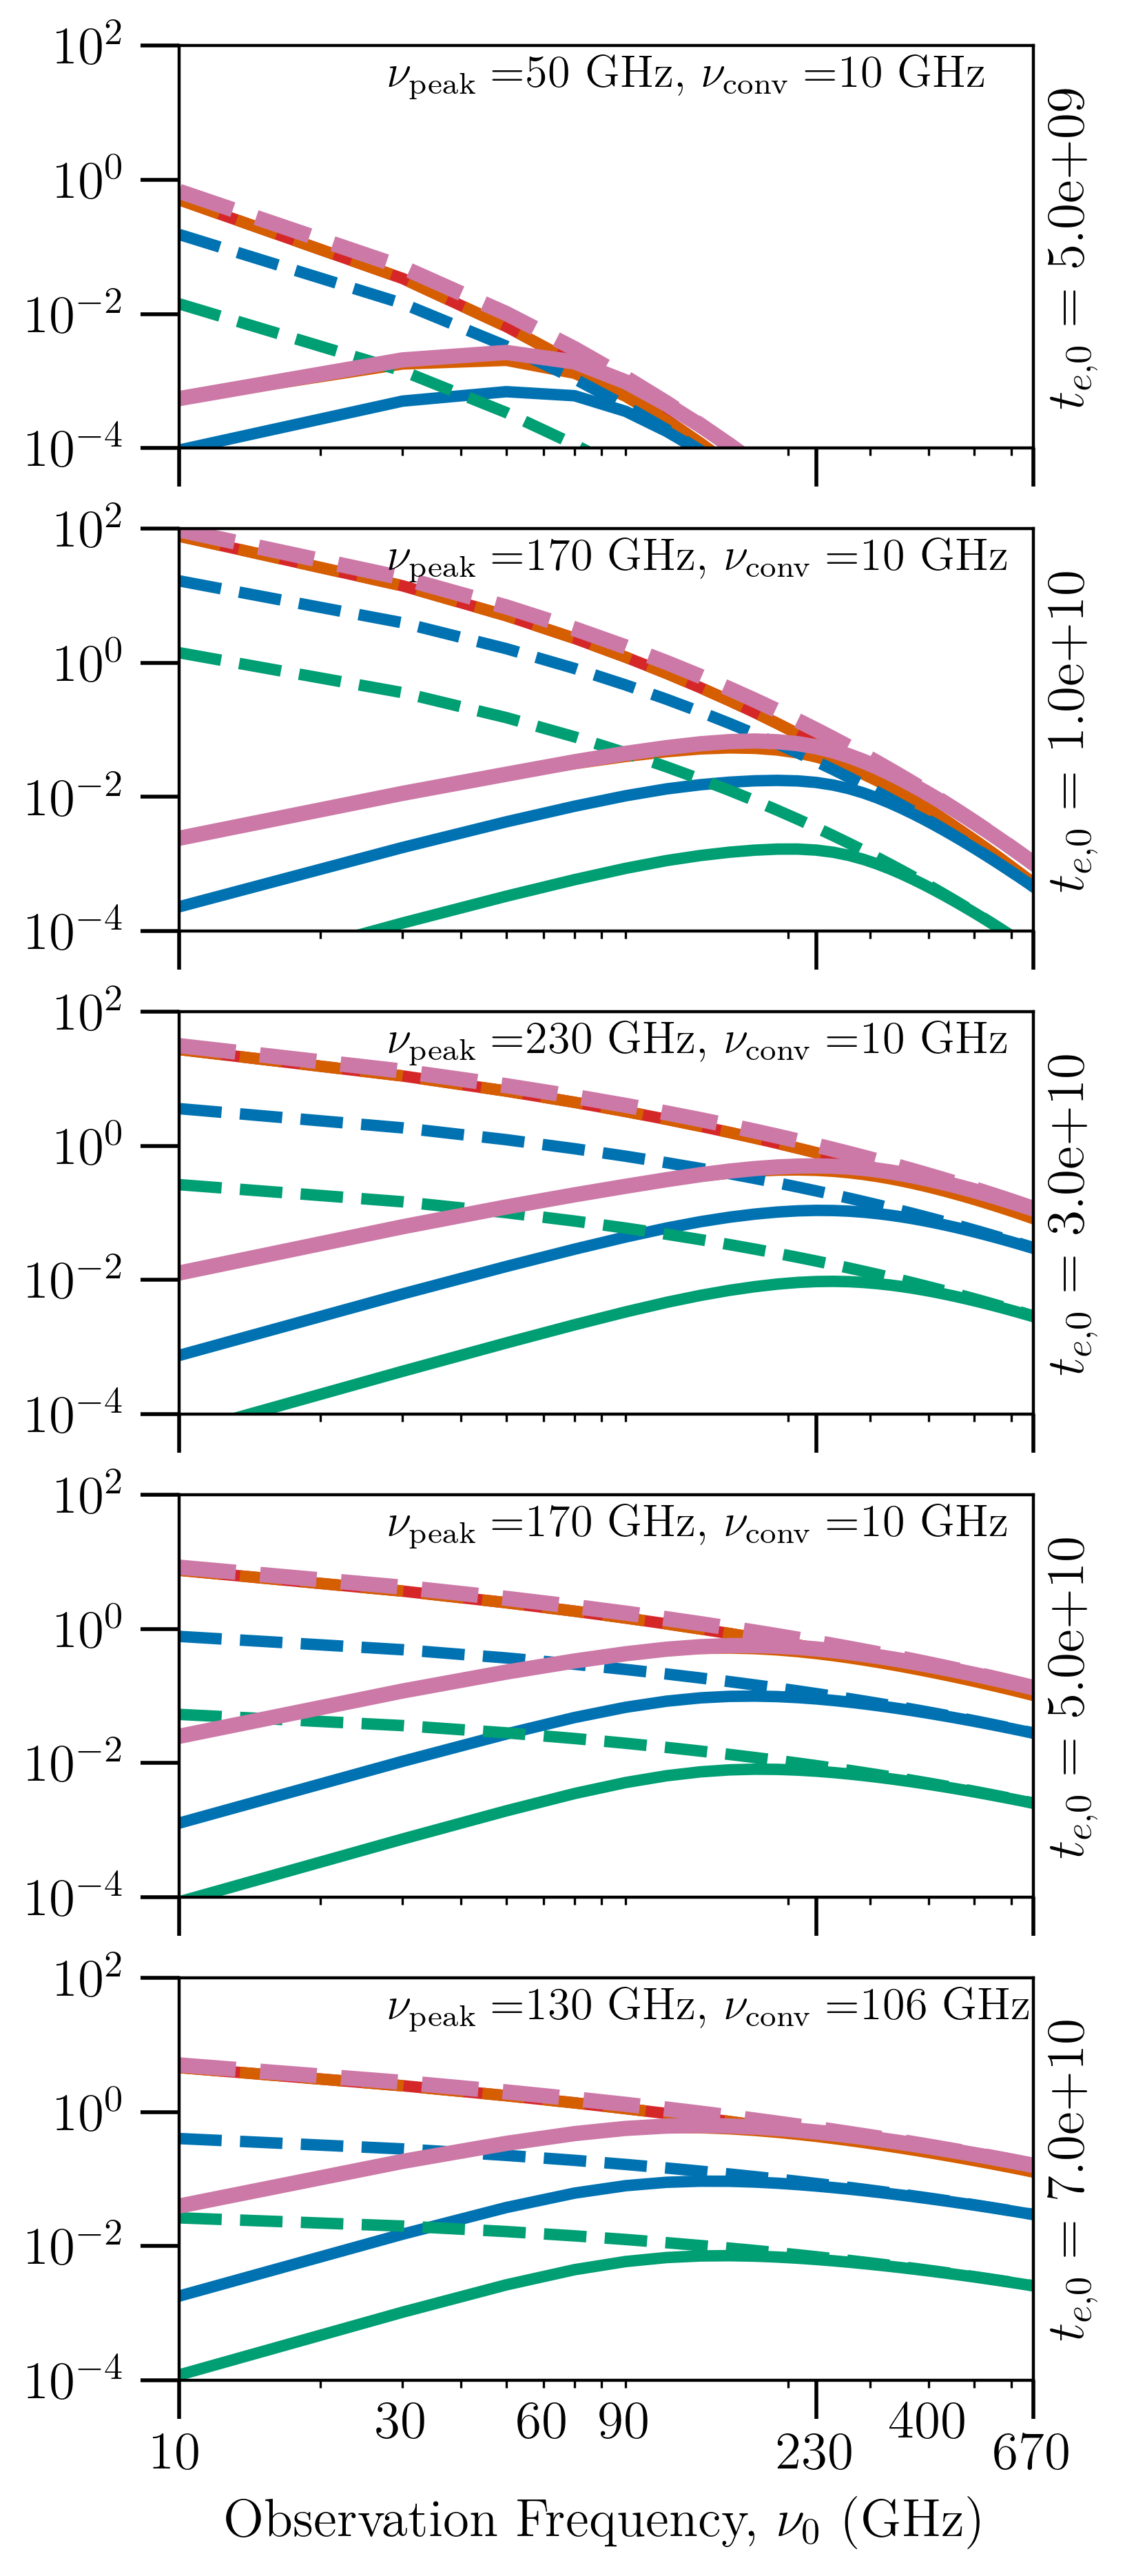

In [51]:
fig, ax = plt.subplots(5,1,dpi=400,figsize=[4,11],sharex=True,sharey=True)


for i in range(5):
    currentModel = bigRun[0,i]
    createFluxRadiiGraph(ax[i],currentModel['np']['xvar']()/1e9,currentModel['np']['jansky_thin'](),currentModel['np']['jansky_thick']())
    text = R"$\nu_{\rm peak}=$" + str("{:.0f}".format(currentModel['flux_peak'](3)/1e9)) + ' ' + astroModels.units_label["nu0"]  + R", $\nu_{\rm conv}=$" + str("{:.0f}".format(currentModel['conv']/1e9)) + ' ' + astroModels.units_label["nu0"]
    ax[i].text(28, 25, text , fontsize=12, color="k")
    ax[i].tick_params('y', which="both", labelleft=True)
    # if (j == 0):
    #     ax[j,i].title.set_text(R'$b_0=$ ' + "{:.1f}".format(currentModel['bp']["b_0"]))

#     if (i == 1):
    ax[i].set_ylabel(R'$t_{e,0}=$ ' + "{:.1e}".format(currentModel['bp']["t_e0"]))
    ax[i].yaxis.set_label_position('right')
ax[4].tick_params('x', which="both", labelbottom=True)
n = 3
[l.set_visible(False) for (i, l) in enumerate(ax[4].xaxis.get_minorticklabels()) if i % n != 0]
ax[i].set_xlabel(R"Observation Frequency, $\nu_0$ (GHz)")
plt.savefig(fig_home + "fluxVNu", dpi=400, bbox_inches='tight')

# Radii 

In [86]:
a = params.spin_case

inc = params.i_case * np.pi / 180  # inclination angle
rh = 1 + np.sqrt(1 - a ** 2)  # event horizon
# angles to sample
varphis = np.linspace(-180, 179, 360) * np.pi / 180

# generate inner shadow (n=0) curve with kgeo
data_inner = kgeo.equatorial_lensing.rho_of_req(a, inc, rh, mbar=0, varphis=varphis)
(_, rhos_inner, alphas_inner, betas_inner) = data_inner

r_inner = image_tools.curve_params(varphis, rhos_inner)

# generate outer shadow (n=inf) curve with kgeo
data_outer = kgeo.equatorial_lensing.rho_of_req(a, inc, rh, mbar=5, varphis=varphis)
(_, rhos_outer, alphas_outer, betas_outer) = data_outer

r_outer = image_tools.curve_params(varphis, rhos_outer)

In [87]:
def radiiVersusFreq(ax,xaxis,mean_radii,conv_1=None,flux_peak=None,r_outer=None):
    
    if conv_1 is not None:
        ax.axvline(conv_1,
                   color=conv_1_style["color"], 
                   linestyle=conv_1_style["linestyle"], 
                   linewidth=conv_1_style["linewidth"]
                  )
    
    if flux_peak is not None:
        ax.axvline(flux_peak, color=flux_peak_style["color"], 
                   linestyle=flux_peak_style["linestyle"], 
                   linewidth=flux_peak_style["linewidth"]
                  )
    
    if r_outer is not None:
        ax.axhline(r_outer,
                   color=r_outer_style["color"],
                   linestyle=r_outer_style["linestyle"], 
                   linewidth=r_outer_style["linewidth"],
                   alpha=0.3
                  )


    amount_to_plot = 4

    for i in reversed(range(amount_to_plot)):
        ax.plot(xaxis, mean_radii[:, i],
                 "-", 
                 label=RingStyle["label"][i],
                 color=RingStyle["color"][i], 
                 linewidth=RingStyle["linewidth"][i])


    # Labels
    # ax.set_xlabel(astroModels.var_label["nu0"].replace('=', '')
    #                + ' (' + astroModels.units_label["nu0"] + ')')
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
    ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

    new_ticks = [xaxis[0], 230, xaxis[xaxis.size - 1]]
    ax.set_xticks(new_ticks)

    # new_ticks = np.append(ax1.get_yticks(), r_outer)
    # new_ticks = np.append(new_ticks, r_inner)
    # print(new_ticks)
    # ax1.set_yticks(new_ticks)
    n = 4  # Keeps every 4th label
    [l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_minorticklabels()) if i % n != 0]
    ax.set_xlim(xaxis[0], xaxis[xaxis.size - 1])

#     ax.set_ylim(0, 6)
    
    ax.tick_params('x', which="both", labelbottom=False)
    ax.tick_params('y', which="both", labelleft=False)



    # ax.tick_params('x', length=20, width=1, which='major', labelrotation=80)

In [117]:
max(1,10)

10

In [125]:
bigRun[0,2]['bp']["t_e0"]

30000000000.0

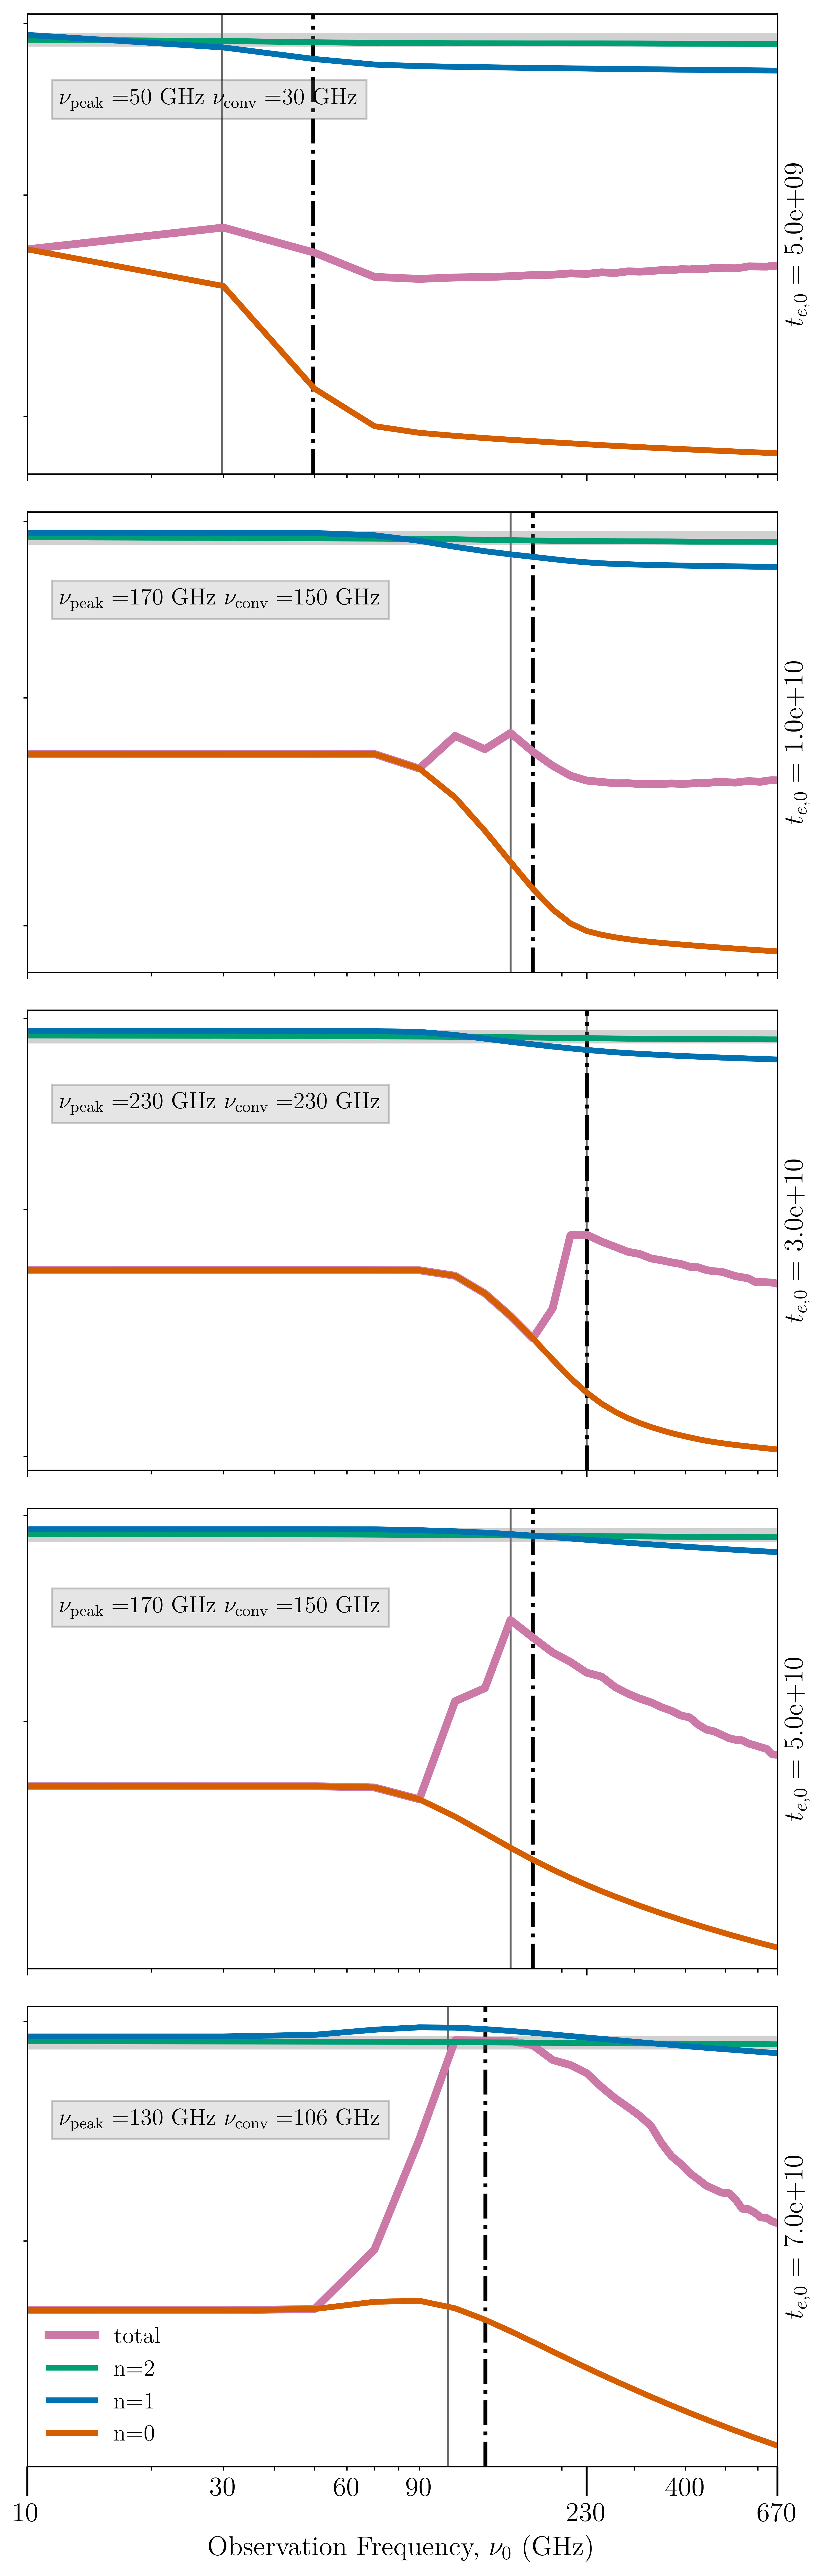

In [127]:

fig, ax = plt.subplots(5, 1, figsize=[6,18], dpi=600,sharex="col",sharey="row")


fig.tight_layout(pad=.5)

ploty = [1,4,7]
plotx = [7,8,9]

alphaBlabel = [1,2,3]
alphaTlabel = [3,6,9]
temodel = 0
meth = 3
k = 1

for i in range(5):

#         conv_1 = action["start"] + action["step"] * ilp.ring_convergance(mean_radii_Thick[i,j][:, 2], mean_radii_Thick[i,j][:, 3],3)
#         conv_1 = conv_1 / astroModels.scale_label[action['var']]

#         flux_peak_thick = action["start"] + action["step"] * np.argmax(janksys_thick[i,j][:, 3])
#         flux_peak_thick = flux_peak_thick / astroModels.scale_label[action['var']]

    current_model = bigRun[0,i]

    radiiVersusFreq(ax[i],
                    current_model['np']['xvar']() / 1e9,
                    current_model['np']['radVnu_thick'](),
                    current_model['conv'](meth)/1e9,
                    current_model['flux_peak'](3)/1e9,
                    r_outer
                   )
    # if k == 3:
    #     ax[i].set_ylabel("Ring Radii ({})".format(R'$\rm R_g$'))

    text = R"$\nu_{\rm peak}=$" + str("{:.0f}".format(current_model['flux_peak'](3)/1e9)) + ' ' + astroModels.units_label["nu0"] + R" $\nu_{\rm conv}=$" + str("{:.0f}".format(current_model['conv'](meth)/1e9)) + ' ' + astroModels.units_label["nu0"]
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    if k == 5:
        ax[i].legend(frameon=False)
        # ax[i,j].text(12, 4.45, text , fontsize=12, color="k",bbox=props)

    t = ax[i].text(12, 4.5, text , fontsize=12, color="k")
    t.set_bbox(dict(facecolor='grey', alpha=0.2, edgecolor='black'))

    ax[i].set_ylabel(R'$t_{e,0}=$ ' + "{:.1e}".format(current_model['bp']["t_e0"]))
    ax[i].yaxis.set_label_position('right')

    k += 1
#         if k == 8:
ax[4].set_xlabel(R"Observation Frequency, $\nu_0$ (GHz)")

#         if k in ploty:
#             ax[i,j].tick_params('y', which="both", labelleft=True)

#         if k in plotx:
ax[4].tick_params('x', which="both", labelbottom=True)
n = 3  # Keeps every 4th label
[l.set_visible(False) for (i, l) in enumerate(ax[4].xaxis.get_minorticklabels()) if i % n != 0]
ax[4].tick_params('x', 
      length=xTickParams["length"], 
      width=xTickParams["width"], 
      which=xTickParams["which"], 
      labelrotation=xTickParams["labelrotation"])

#         if k in alphaBlabel:
#             ax[i,j].title.set_text(R'$\alpha_B=$ ' + str(current_model['bp']["p_mag"]))

#         if k in alphaTlabel:
#             ax[i,j].set_ylabel(R'$\alpha_T=$ ' + str(current_model['bp']["p_temp"]))
#             ax[i,j].yaxis.set_label_position('right')



# fig.suptitle(R"$T_{e,0} = $" + "{:.1e}".format(currentModel['bp']['t_e0']),y=1.005)
        
plt.savefig(fig_home + "ThickRadiiVNuGrid" ,dpi=600,bbox_inches='tight')

# Janksy Matching

In [52]:
xGHZ = np.array([22,22,43,24,43,43,86,86.8,129.3,93,221,221,230])*1e9

yJansky = np.array([1.12,1.01,.94,.88,.59,.65,.53,.93,.65,1.41,1.10,1.33,.5])
errJansky = np.array([0.11,0.10,0.09,0.09,0.06,0.06,0.1,0.09,0.2,0.07,0.11,0.07,0])
sortedyJansky = np.array([xs for _,xs in sorted(zip(xGHZ,yJansky))])
sortederrJansky  = np.array([xs for _,xs in sorted(zip(xGHZ,errJansky))])


yNuFNu = np.array([.246,.232,.404,.211,.254,.279,.458,.807,.84,1.31,2.43,2.94,1.15])*10e-12
errNuFNu = np.array([0.024,0.023,0.039,0.021,0.024,0.027,0.086,0.078,0.026,0.07,0.24,0.15,0])*10e-12
sortedflux = np.array([xs for _,xs in sorted(zip(xGHZ,yNuFNu ))])
yerrortedX  = np.array([xs for _,xs in sorted(zip(xGHZ,errNuFNu))])
xGHZ.sort()

In [76]:
def plotModel(ModelName:str, ax,bigRunVar,runVar,add_5=False):

    xvar =bigRun[ModelName]['np']["xvar"]()
    if add_5:
        yvar = bigRun[ModelName]['np']["jansky_thick"]()[:,3] + .5
    else:
        yvar = bigRun[ModelName]['np']["jansky_thick"]()[:,3]
        
    la = R'$ T_{e,0} = ' + "{:.0e}".format(bigRun[ModelName]['bp']['t_e0']) + "$"
    ax.plot(xvar[xvar<=230e9],yvar[xvar<=230e9],label=la)

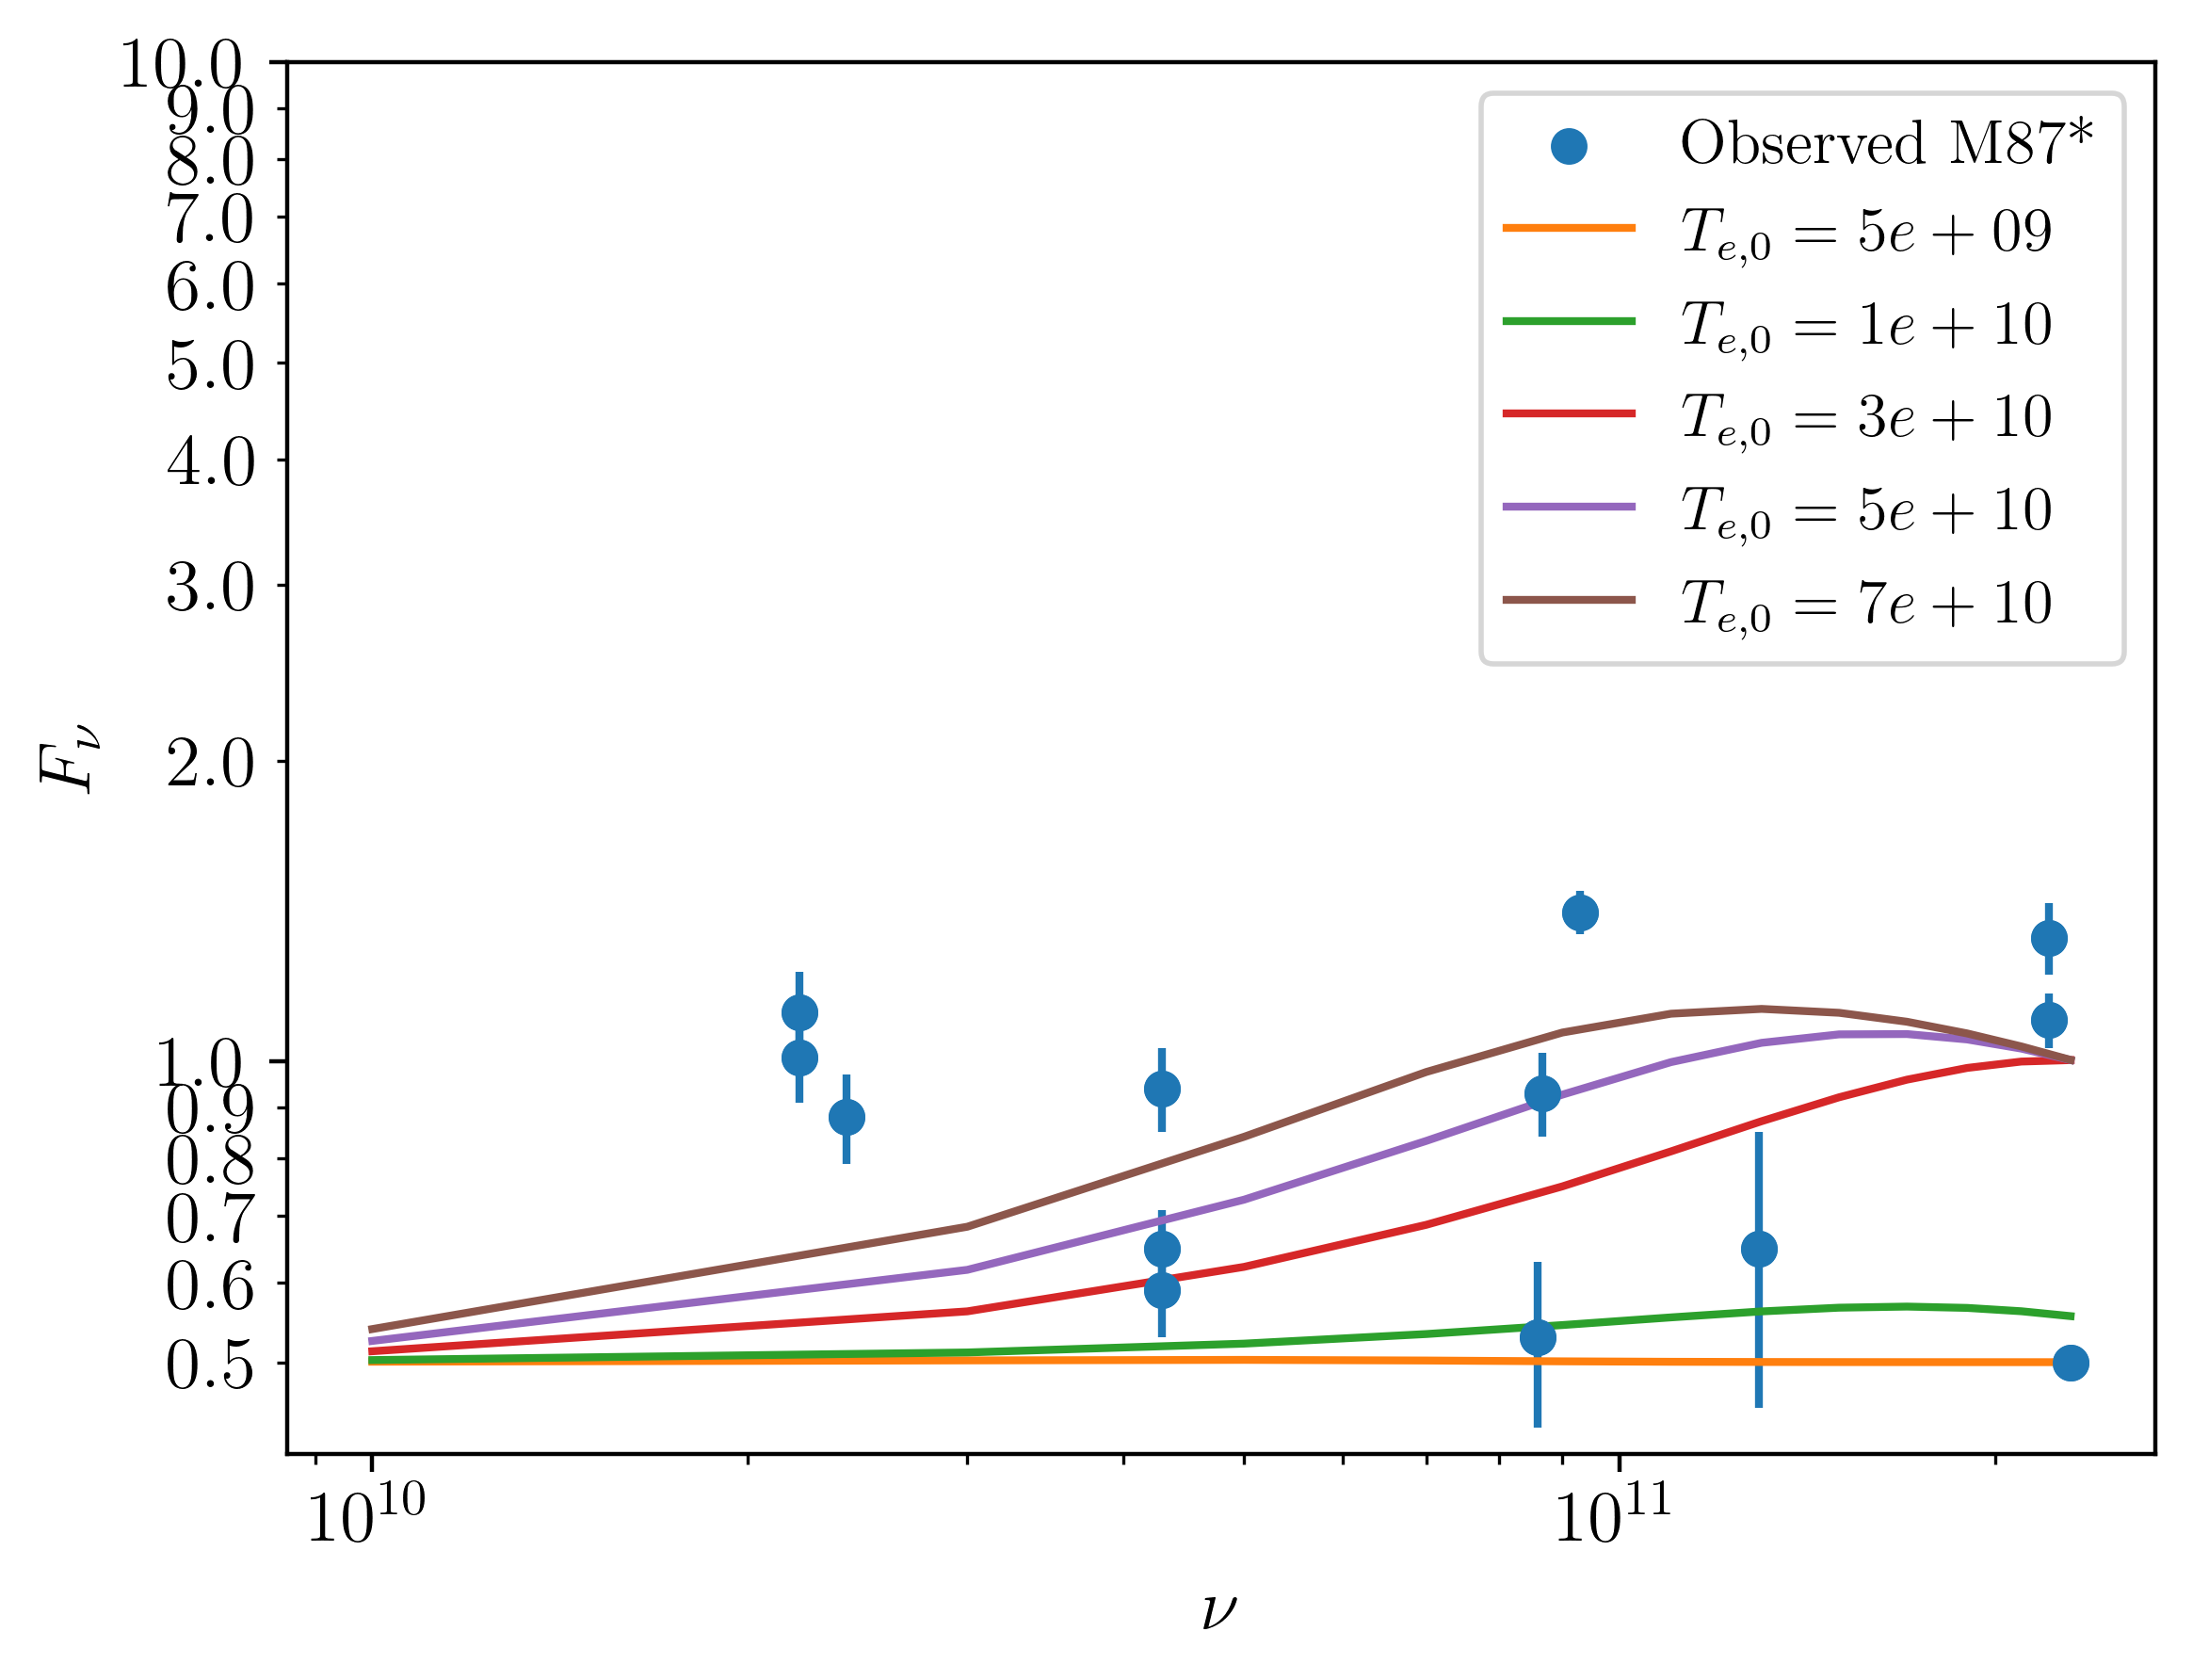

In [79]:
fig,(ax1) = plt.subplots(1,1,dpi=400)
ax1.scatter(xGHZ,sortedyJansky,label="Observed M87*")
ax1.errorbar(xGHZ,sortedyJansky, yerr=sortederrJansky, fmt="o")
plotModel("ModelC_1",ax1,bigRun,run2,True)
plotModel("ModelC_2",ax1,bigRun,run2,True)
plotModel("ModelC_3",ax1,bigRun,run2,True)
plotModel("ModelC_4",ax1,bigRun,run2,True)
plotModel("ModelC_5",ax1,bigRun,run2,True)
# plotModel("ModelA_43",ax1,bigRun2,run2,True)
# plotModel("ModelA_53",ax1,bigRun2,run2,True)

# plotModel("ModelA_61",ax1,bigRun2,run2,True)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylim(0,10)
ax1.set_xlabel(R"$\nu$")
ax1.set_ylabel(R"$F_\nu$")
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax1.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%.1f"))
# plt.savefig("DemoComp2.jpeg", dpi=400, bbox_inches='tight')

# ax1.set_ylim([0,2e0])
ax1.legend()
# ax1.set_title(R".5 ($\rm J_y$) added")
plt.savefig(fig_home + "ObsCOmpare.jpeg", bbox_inches='tight')